<a href="https://colab.research.google.com/github/MINJILEE-PURDUE/erc_tree_semantic_segmentation_in_mlops/blob/main/reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless matplotlib

In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()

# List the uploaded files (optional)
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")


Saving MAX_0022_enhanced_final.png to MAX_0022_enhanced_final.png
Uploaded file: MAX_0022_enhanced_final.png


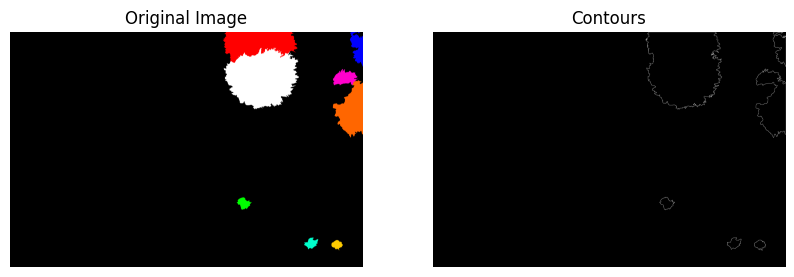

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(list(uploaded.keys())[0])

# Convert the image to grayscale
# The error was caused because 'uploaded' is a dictionary, not the image data.
# 'image' is the variable holding the image data loaded by cv2.imread.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to separate regions
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image for drawing contours
contour_image = np.zeros_like(image)

# Draw contours on the blank image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# Plot the original and the contour image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contours')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

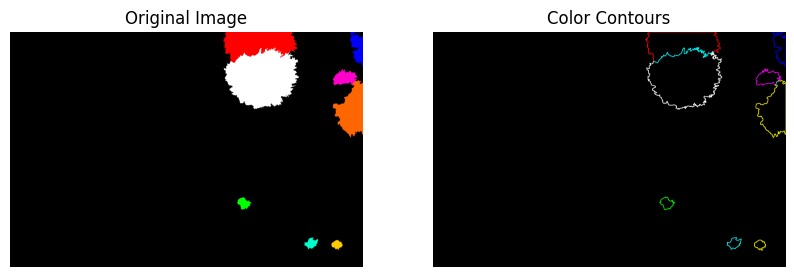

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (update the filename if necessary)
image = cv2.imread(list(uploaded.keys())[0])

# Convert the image to RGB (for proper color display in matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a blank image with the same shape as the original image
contour_image = np.zeros_like(image)

line_thickness = 5

# Loop through each color channel (R, G, B)
for i in range(3):  # Assuming the image has 3 channels
    # Threshold each channel separately
    _, thresh = cv2.threshold(image[:, :, i], 1, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded channel
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a temporary copy of the contour image for the current channel
    temp_image = contour_image.copy()  # Create a copy to avoid modifying the original
    cv2.drawContours(temp_image, contours, -1, (255, 255, 255), 10) # Draw on the copy
    # Assign the modified channel back to the contour_image
    contour_image[:, :, i] = temp_image[:, :, i] # Update the contour_image

# Plot the original image and the color contour image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Color Contours')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

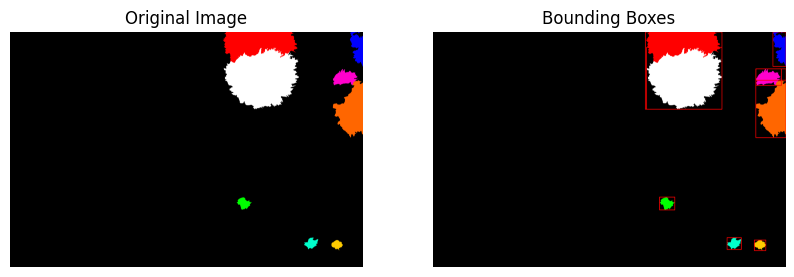

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image (update the filename if necessary)
# Instead of directly using a filename, use the uploaded image like before
image = cv2.imread(list(uploaded.keys())[0])

# Check if the image was loaded successfully
if image is None:
    print("Error: Image could not be loaded. Please check the filename or file path.")
else:
    # Convert the image to RGB (for proper color display in matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a copy of the image for bounding box visualization
    bbox_image = image_rgb.copy()

    # Loop through each color channel (R, G, B)
    for i in range(3):  # Assuming the image has 3 channels
        # Threshold each channel separately
        _, thresh = cv2.threshold(image[:, :, i], 1, 255, cv2.THRESH_BINARY)

        # Find contours in the thresholded channel
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw bounding boxes for each contour
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)  # Get bounding box
            cv2.rectangle(bbox_image, (x, y), (x + w, y + h), (255, 0, 0), 10)  # Draw rectangle (color: blue)

    # Plot the original image and the image with bounding boxes
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Bounding Boxes')
    plt.imshow(bbox_image)
    plt.axis('off')

    plt.show()

In [ ]:
# Function to convert RGB to a hex color
def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(color[0], color[1], color[2])

# Define a mapping of hex codes to color names
color_map = {
    "#ff0000": "Red",
    "#00ff00": "Green",
    "#0000ff": "Blue",
    "#ffffff": "White",
    "#00ffcc": "Cyan",
    "#ff00cc": "Magenta",
    "#ffcc00": "Yellow",
    "#ff6600": "Orange",
    # Add more colors if needed
}

# Dictionary to store the results
bounding_boxes = []

# Loop through each color channel (R, G, B)
for i in range(3):  # Assuming the image has 3 channels
    # Threshold each channel separately
    _, thresh = cv2.threshold(image[:, :, i], 1, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded channel
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)  # Get bounding box
        # Get the color at the center of the bounding box
        center_x, center_y = x + w // 2, y + h // 2
        color = image_rgb[center_y, center_x]  # Get the RGB color
        hex_color = rgb_to_hex(color)  # Convert to hex

        # Skip black (#000000)
        if hex_color.lower() == "#000000":
            continue

        # Map hex color to color name
        color_name = color_map.get(hex_color.lower(), hex_color)  # Default to hex if not found

        # Append results
        bounding_boxes.append((color_name, center_x, center_y))

# Display the results
for color_name, x, y in bounding_boxes:
    print(f"{color_name}: {x}, {y}")

Cyan: 4668, 3284
Magenta: 5203, 700
White: 3894, 718
Yellow: 5070, 3311
Cyan: 4668, 3284
Green: 3629, 2662
Orange: 5238, 1194
White: 3894, 718
Yellow: 5070, 3311
Orange: 5238, 1106
White: 3885, 599
